In [354]:
%matplotlib widget

In [355]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [356]:
#read file
file = '../ELISA-data/csv/ELISA PB1.csv'
raw_df = pd.read_csv(file)
raw_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Dilution Ratio,Row,3343 SLCO6C1,3344 SLCO6C1,seconday antibody (NC),NaN
2,10,1,1.602,1.607,0.799,NaN
3,100,2,1.715,1.471,0.134,NaN
4,1000,3,1.3,1.426,0.202,NaN
5,10000,4,0.916,1.382,NaN,NaN
6,100000,5,0.67,1.169,NaN,NaN
7,1000000,6,0.338,0.82,NaN,NaN
8,10000000,7,0.326,0.418,NaN,NaN
9,KLH,8,1.237,1.15,NaN,NaN


In [357]:
#isolating relevant data

clean_df = raw_df[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]
clean_df.columns = clean_df.iloc[1].rename(None)


clean_df = clean_df.drop([0,1,10,11,12])
clean_df.set_index("Row")


,Dilution Ratio,3343 SLCO6C1,3344 SLCO6C1
Row,,,
1,10,1.602,1.607
2,100,1.715,1.471
3,1000,1.3,1.426
4,10000,0.916,1.382
5,100000,0.67,1.169
6,1000000,0.338,0.82
7,10000000,0.326,0.418
8,KLH,1.237,1.15


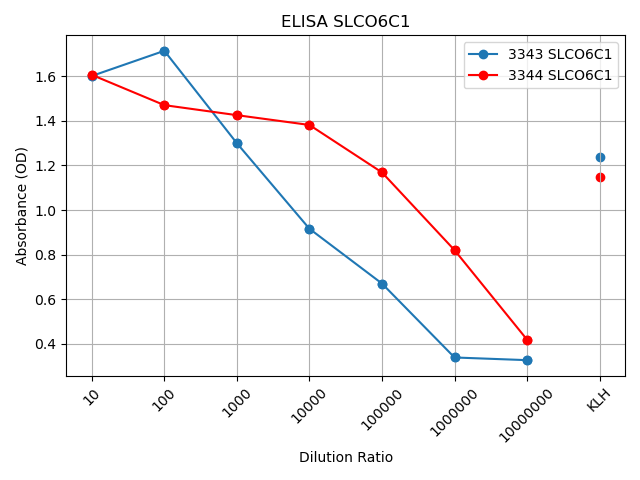

In [358]:
#prepare data for plot
clean_df['3343 SLCO6C1'] = clean_df['3343 SLCO6C1'].astype(float)
clean_df['3344 SLCO6C1'] = clean_df['3344 SLCO6C1'].astype(float)
clean_df_no_klh = clean_df.iloc[0:7]

#plot
plt.scatter(clean_df["Dilution Ratio"], clean_df["3343 SLCO6C1"], marker='o')
plt.scatter(clean_df["Dilution Ratio"], clean_df["3344 SLCO6C1"], color='red',marker='o')
slc43, = plt.plot(clean_df_no_klh["Dilution Ratio"], clean_df_no_klh['3343 SLCO6C1'], marker='o', label='3343 SLCO6C1')
slc44, = plt.plot(clean_df_no_klh["Dilution Ratio"], clean_df_no_klh["3344 SLCO6C1"], color='red', marker='o', label='3344 SLCO6C1')

#format
plt.grid()
plt.xticks(rotation=45)
plt.xlabel("Dilution Ratio")
plt.ylabel("Absorbance (OD)")
plt.legend(handles=[slc43, slc44], loc="best")
plt.title("ELISA SLCO6C1")

#save output
plt.tight_layout()
plt.savefig("../ELISA-data/charts/SLCO6C1")
plt.show()
